In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def algorithm_1(A, sample_size, n, N):

    k = sample_size
    K = randsample(N, k)

    X = A[:, K]
    
    set_ = list(set(N) - set(K))
    
    Y = np.zeros((n, n-k))

    Y[K, :] = X[set_, :].T
    Y_hat = np.dot(X, np.dot(np.linalg.pinv(X), Y))
    A_hat = np.zeros((n,n))

    A_hat[:, K] = X
    A_hat[:, list(set(N) - set(K))] = Y_hat

    G_algo1 = nx.from_numpy_matrix(A_hat)
    return G_algo1

In [2]:
def plot_aggregation(df, algorithm, column, original, network):
    plt.figure(figsize=(13,7))
    df_ = df[df['Algorithm'] == f'Algorithm {algorithm}']

    df['total_elapsed_time'] = df['execution_time'] + df['clustering_execution_time']

    averages = df_.groupby('sample_percentage', as_index=False)[column].mean()
    std = df_.groupby('sample_percentage', as_index=False)[column].std()
    
    mean_original = np.mean(original)
    std_original = np.std(original)

    plt.errorbar(averages['sample_percentage'], averages[column], std[column])
    
    #fig, ax = plt.subplots()
    plt.axhline(y=mean_original, color='b', linestyle='-')
    plt.fill_between(averages['sample_percentage'], mean_original - std_original, mean_original + std_original, color='b', alpha=.15)
    
    plt.title(f'Algorithm {algorithm} - {column} x Sample Size for {network}')
    plt.xlabel('Sample size (%)')
    plt.ylabel(column)
    plt.legend(['Original Graph', 'Original Std', 'Sampled Graph'])

In [3]:
karate = pd.read_csv('data/karate.csv')
facebook = pd.read_csv('data/facebook.csv')
CaGr = pd.read_csv('data/Ca-Gr.csv')
p2p_gnu = pd.read_csv('data/p2p-gnu.csv')

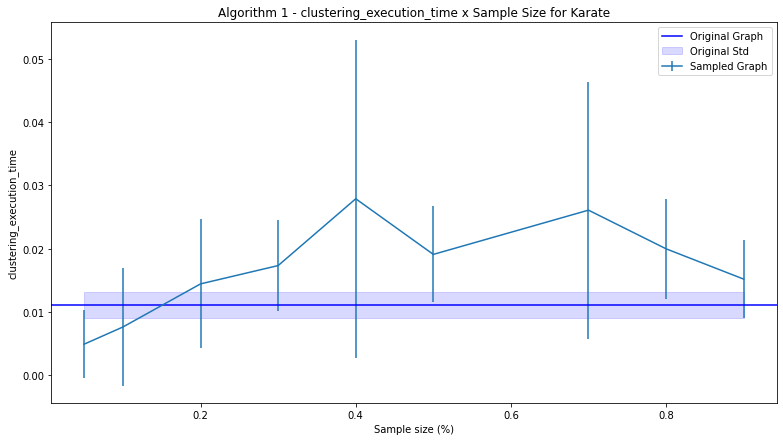

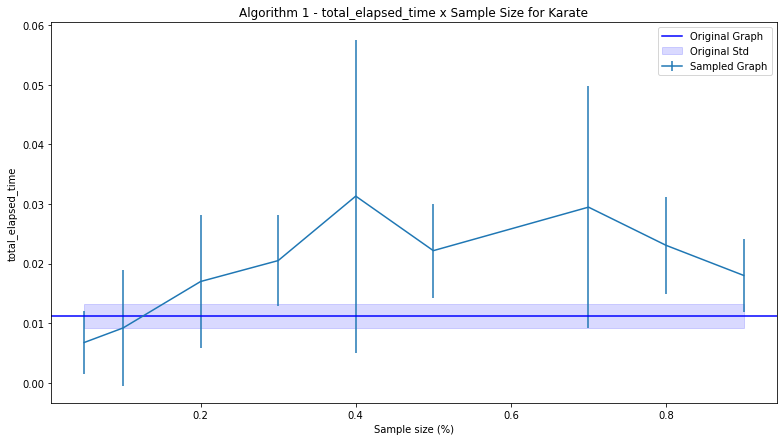

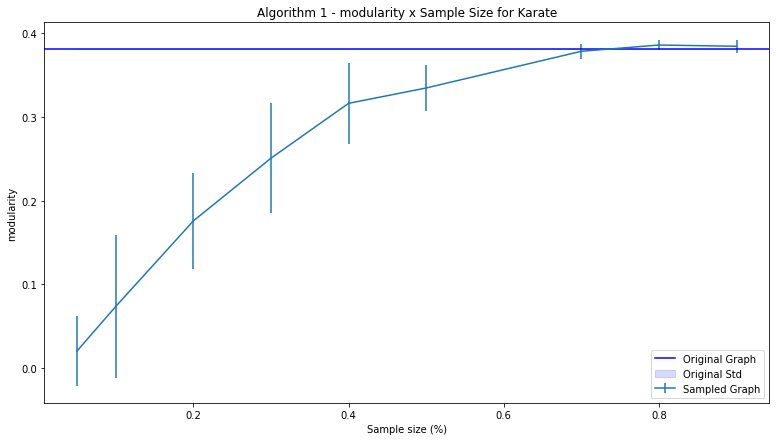

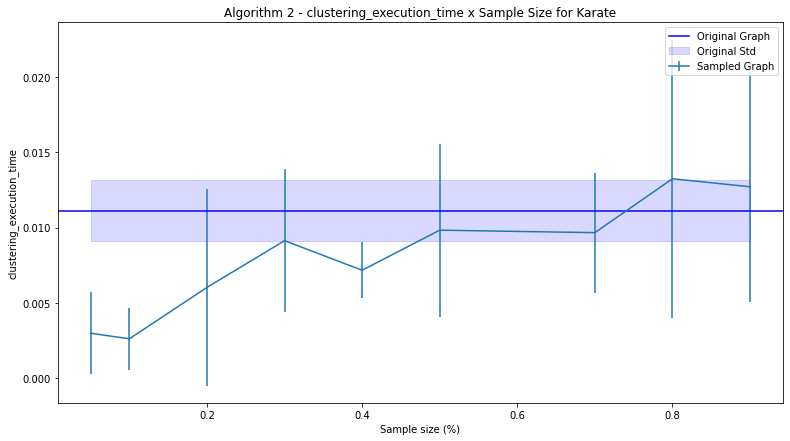

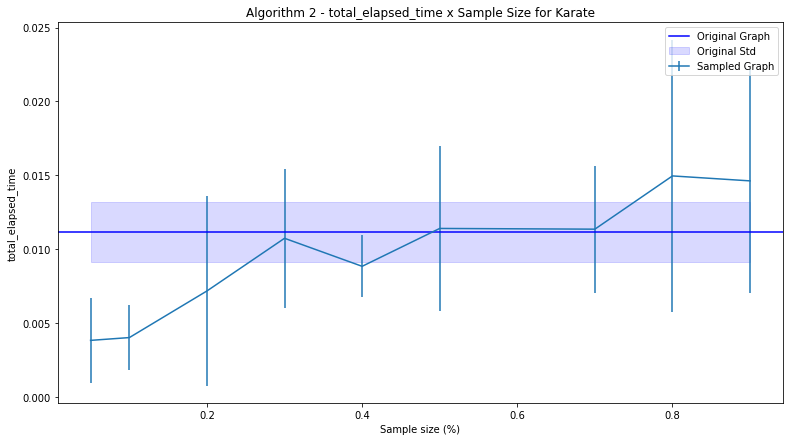

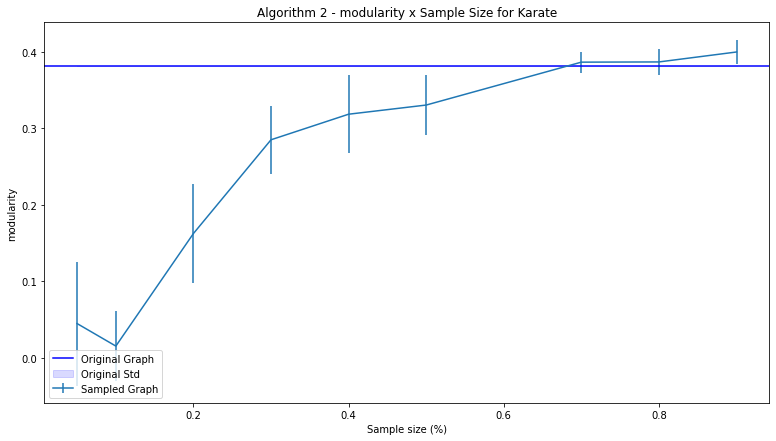

In [4]:
plot_aggregation(karate, 1, 'clustering_execution_time', karate['original_elapsed_time'], 'Karate')
plot_aggregation(karate, 1, 'total_elapsed_time', karate['original_elapsed_time'], 'Karate')
plot_aggregation(karate, 1, 'modularity', karate['original_mod'], 'Karate')

plot_aggregation(karate, 2, 'clustering_execution_time', karate['original_elapsed_time'], 'Karate')
plot_aggregation(karate, 2, 'total_elapsed_time', karate['original_elapsed_time'], 'Karate')
plot_aggregation(karate, 2, 'modularity', karate['original_mod'], 'Karate')

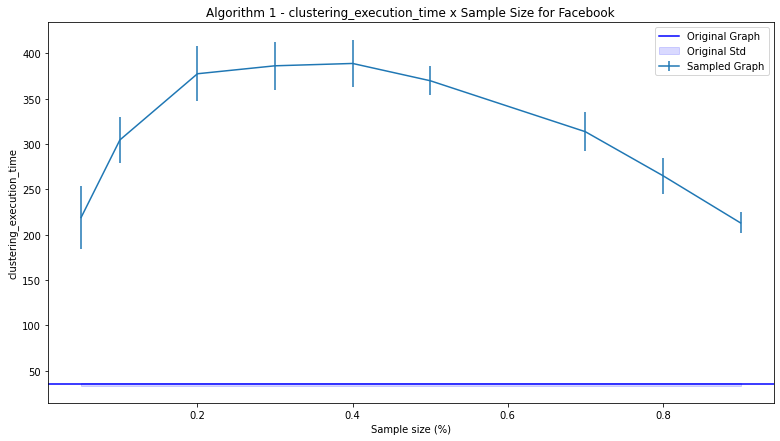

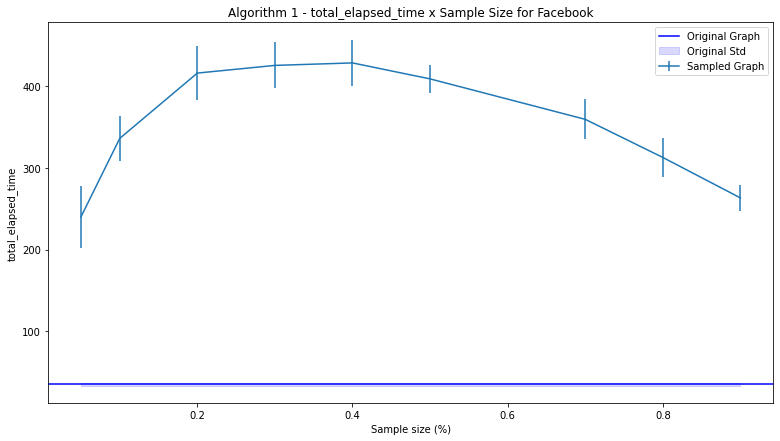

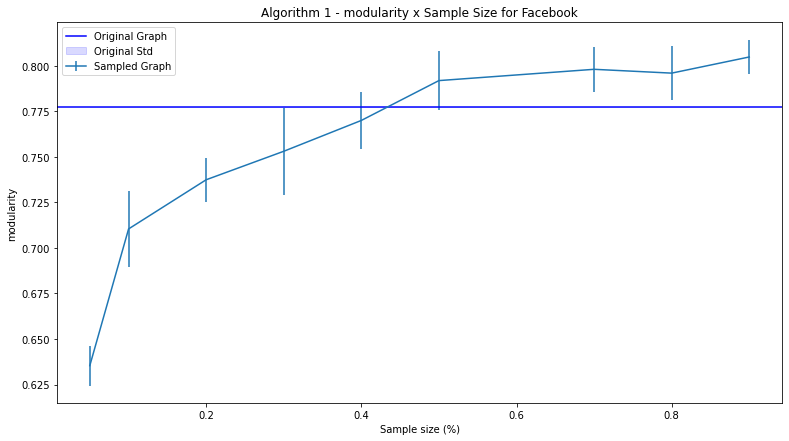

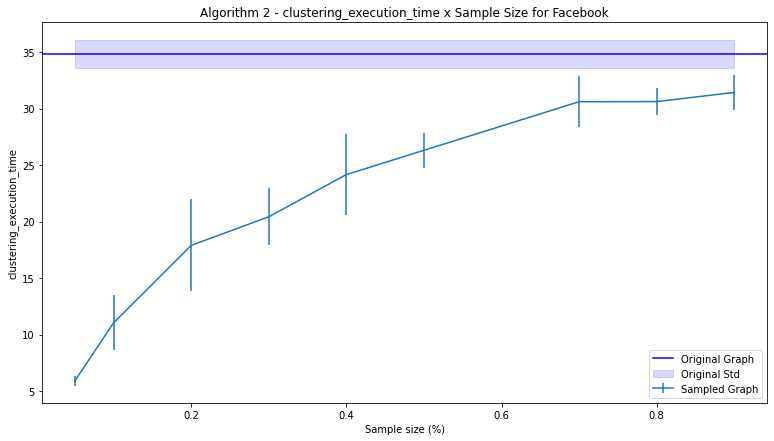

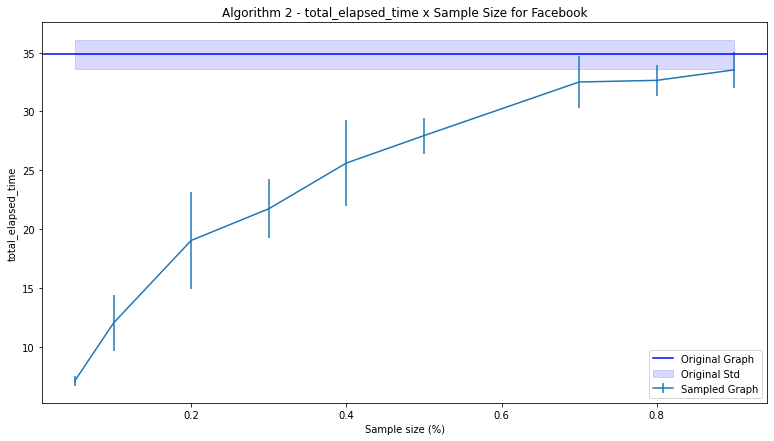

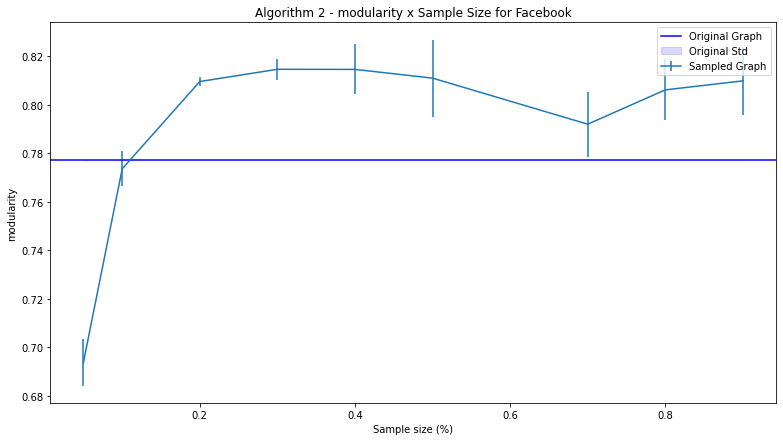

In [5]:
plot_aggregation(facebook, 1, 'clustering_execution_time', facebook['original_elapsed_time'], 'Facebook')
plot_aggregation(facebook, 1, 'total_elapsed_time', facebook['original_elapsed_time'], 'Facebook')
plot_aggregation(facebook, 1, 'modularity', facebook['original_mod'], 'Facebook')

plot_aggregation(facebook, 2, 'clustering_execution_time', facebook['original_elapsed_time'], 'Facebook')
plot_aggregation(facebook, 2, 'total_elapsed_time', facebook['original_elapsed_time'], 'Facebook')
plot_aggregation(facebook, 2, 'modularity', facebook['original_mod'], 'Facebook')

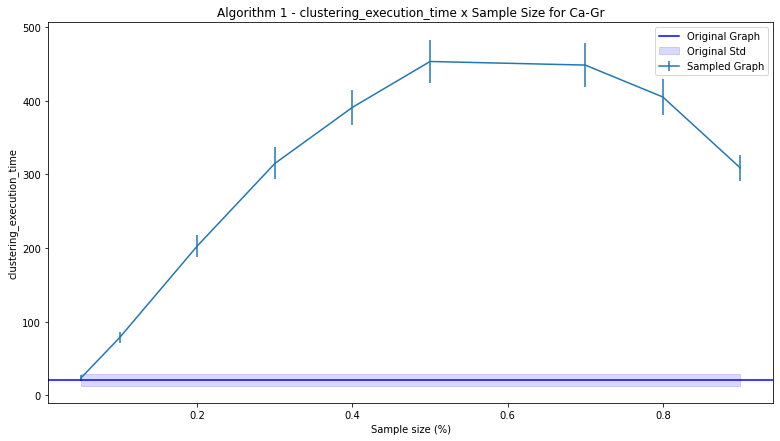

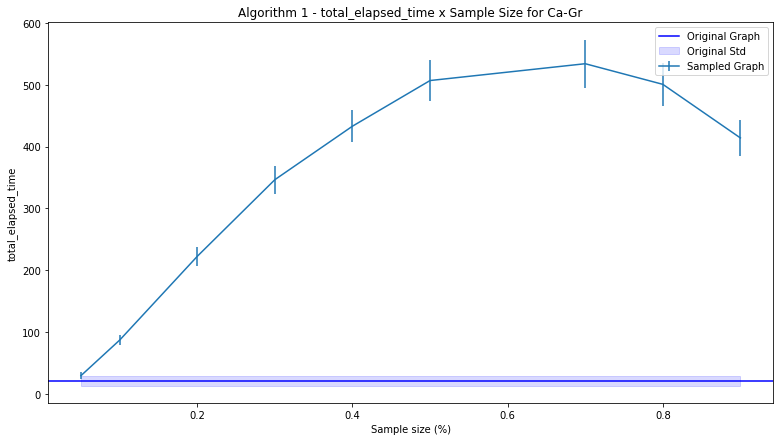

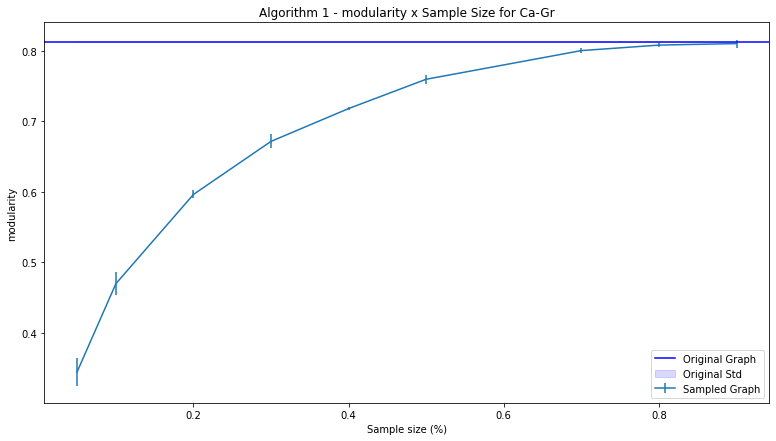

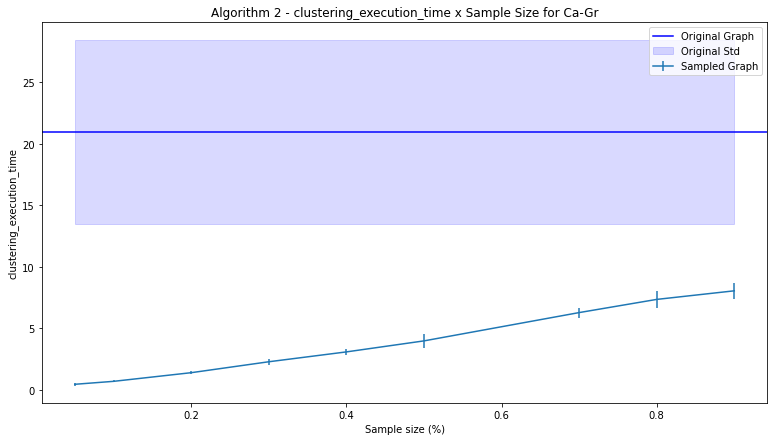

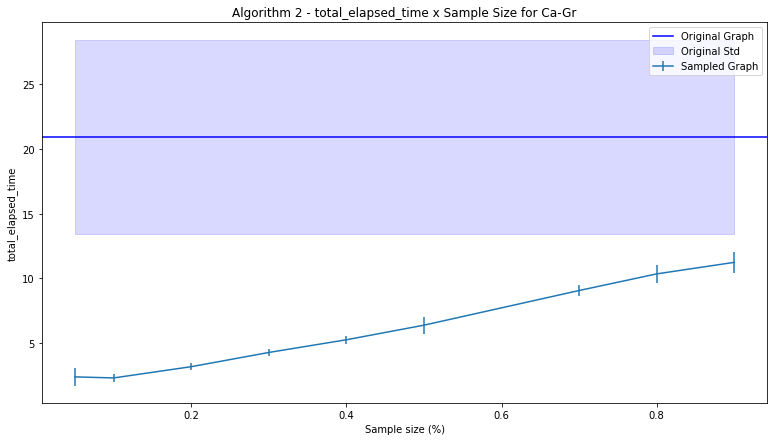

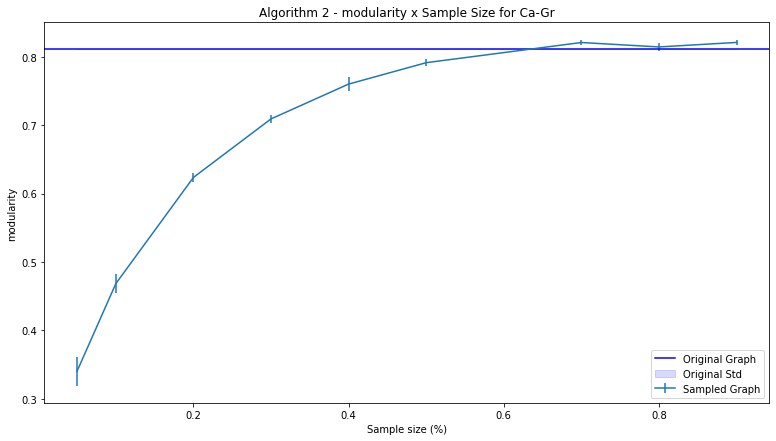

In [6]:
plot_aggregation(CaGr, 1, 'clustering_execution_time', CaGr['original_elapsed_time'], 'Ca-Gr')
plot_aggregation(CaGr, 1, 'total_elapsed_time', CaGr['original_elapsed_time'], 'Ca-Gr')
plot_aggregation(CaGr, 1, 'modularity', CaGr['original_mod'], 'Ca-Gr')

plot_aggregation(CaGr, 2, 'clustering_execution_time', CaGr['original_elapsed_time'], 'Ca-Gr')
plot_aggregation(CaGr, 2, 'total_elapsed_time', CaGr['original_elapsed_time'], 'Ca-Gr')
plot_aggregation(CaGr, 2, 'modularity', CaGr['original_mod'], 'Ca-Gr')

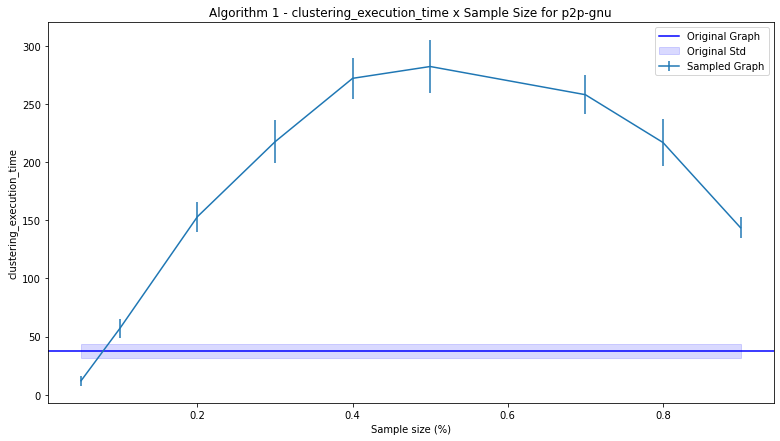

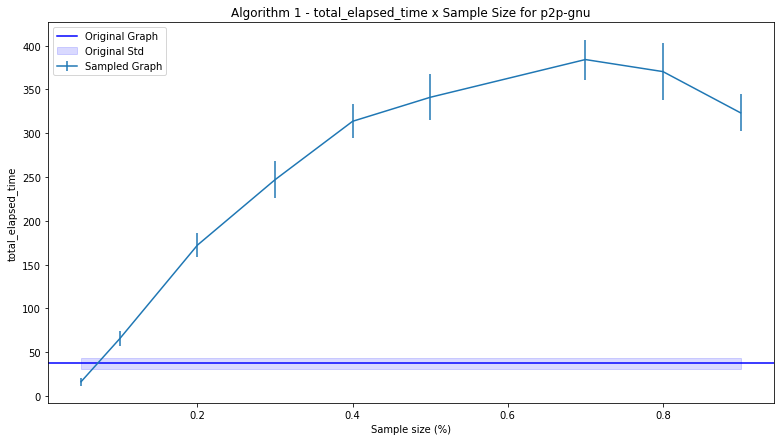

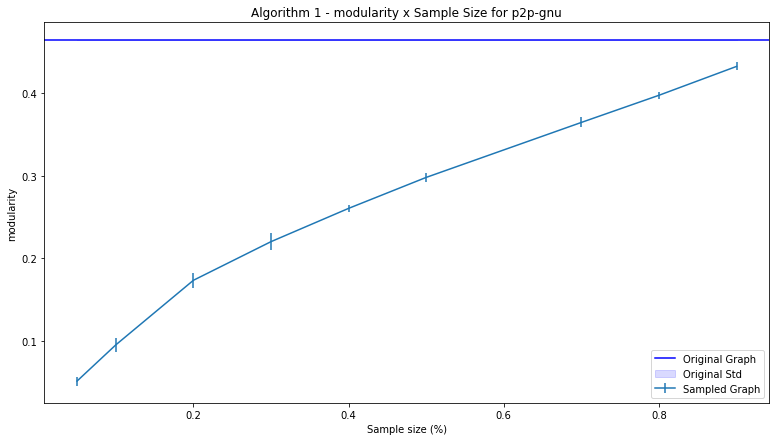

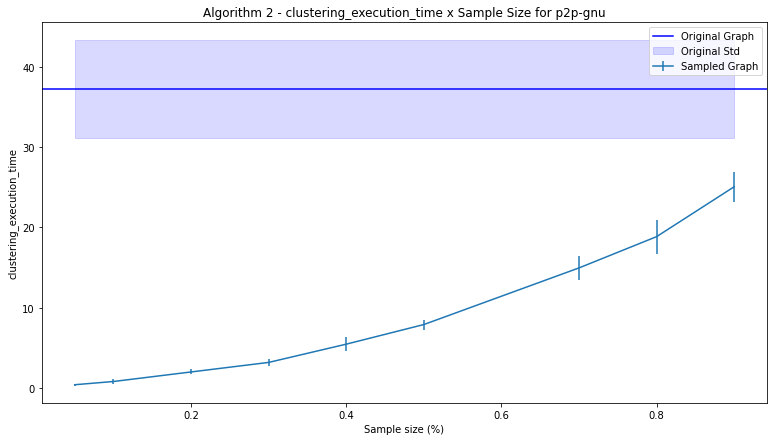

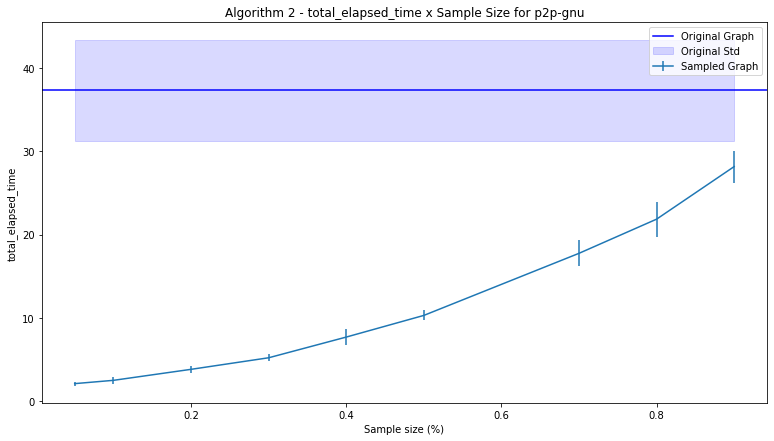

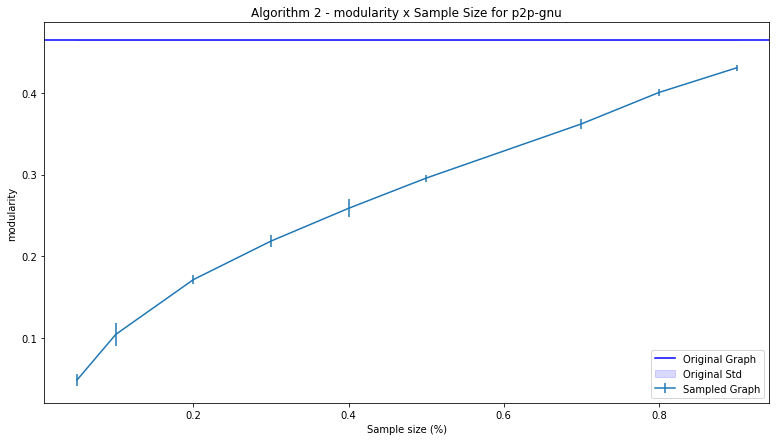

In [7]:
plot_aggregation(p2p_gnu, 1, 'clustering_execution_time', p2p_gnu['original_elapsed_time'], 'p2p-gnu')
plot_aggregation(p2p_gnu, 1, 'total_elapsed_time', p2p_gnu['original_elapsed_time'], 'p2p-gnu')
plot_aggregation(p2p_gnu, 1, 'modularity', p2p_gnu['original_mod'], 'p2p-gnu')

plot_aggregation(p2p_gnu, 2, 'clustering_execution_time', p2p_gnu['original_elapsed_time'], 'p2p-gnu')
plot_aggregation(p2p_gnu, 2, 'total_elapsed_time', p2p_gnu['original_elapsed_time'], 'p2p-gnu')
plot_aggregation(p2p_gnu, 2, 'modularity', p2p_gnu['original_mod'], 'p2p-gnu')